In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc
import seaborn as sns

np.random.seed(84)

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

out_data_path = "../data/"

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.0 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 python-igraph==0.10.5 pynndescent==0.5.10


### Load the Cells Data

In [3]:
cells_data_path = out_data_path + "cells_ad.h5ad"
cell_adata = ad.read_h5ad(cells_data_path)

/Users/nellia/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


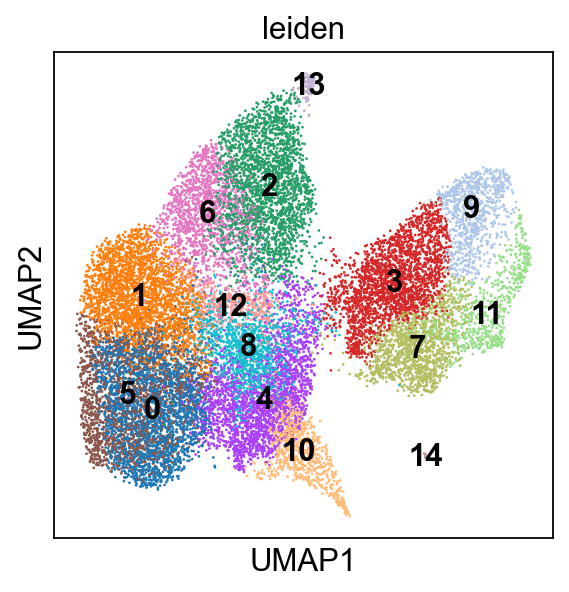

In [4]:
# UMAP
plt.rcParams['svg.fonttype'] = 'none'
sc.pl.umap(cell_adata, color='leiden', legend_loc='on data', save="_cluster.svg")

computing density on 'umap'
--> added
    'umap_density_dataset', densities (adata.obs)
    'umap_density_dataset_params', parameter (adata.uns)


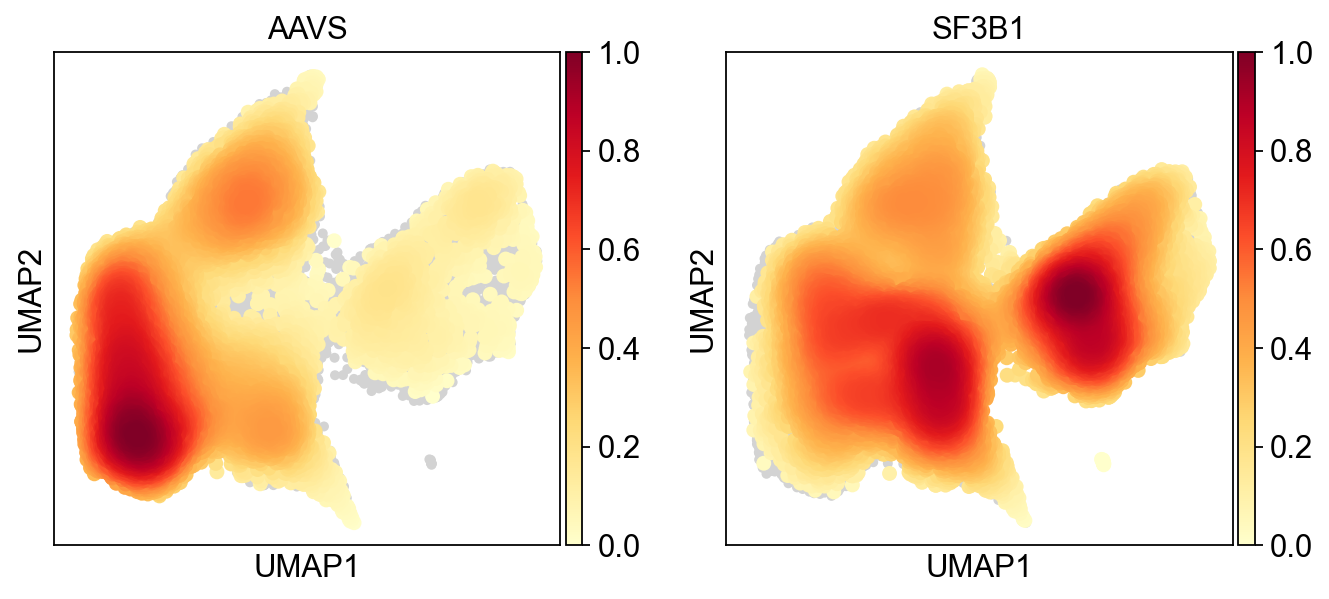

In [5]:
sc.tl.embedding_density(cell_adata, groupby='dataset')
sc.pl.embedding_density(cell_adata, groupby='dataset', save='density.svg')

In [6]:
celltype_markers = {'HSC':['PROM1','AVP','HLF'],
                    'HSPC':['PROM1','CD34','GATA2'],
                    'Myeloid':['MPO', 'S100A8', 'S100A9', 'ELANE', 'AZU1'],
                    'Erythroid':['KLF1', 'GATA1', 'TFRC'],
                    'MK':['PF4', 'ITGA2B', 'GP9'],
                    'MAST':['KIT', 'KRT1'],
                    'Lymphoid':['IL7R', 'CD7', 'MME']}

/Users/nellia/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


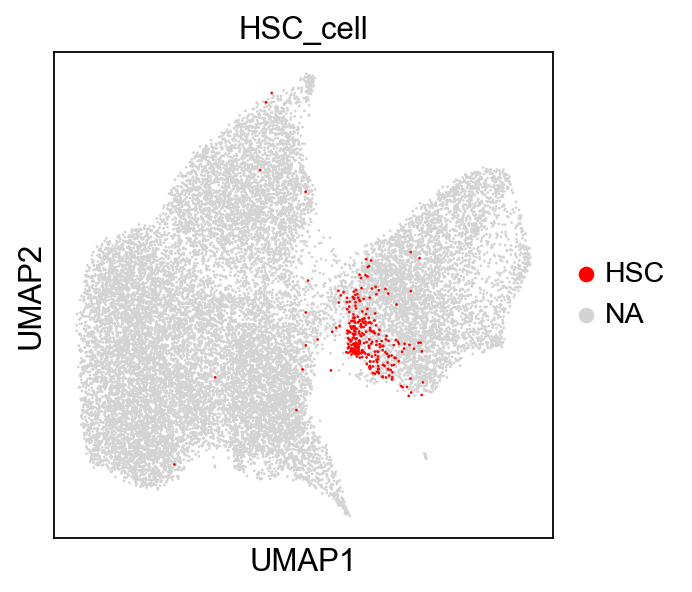

/Users/nellia/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


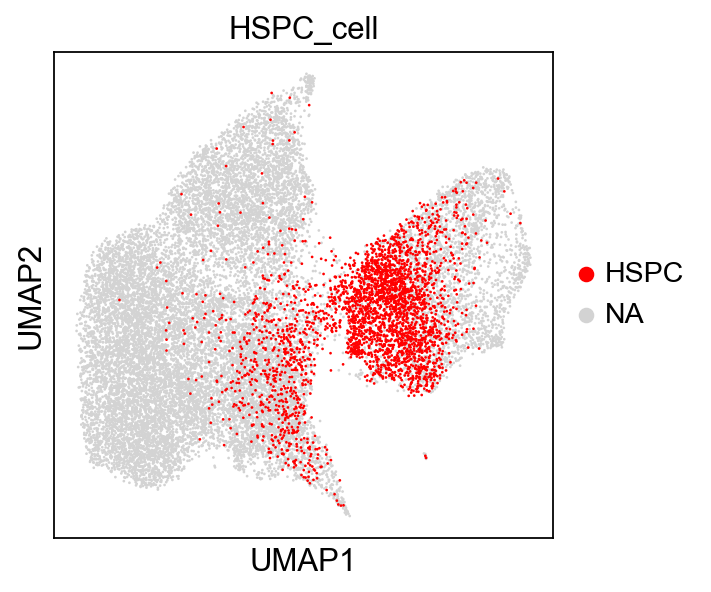

/Users/nellia/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


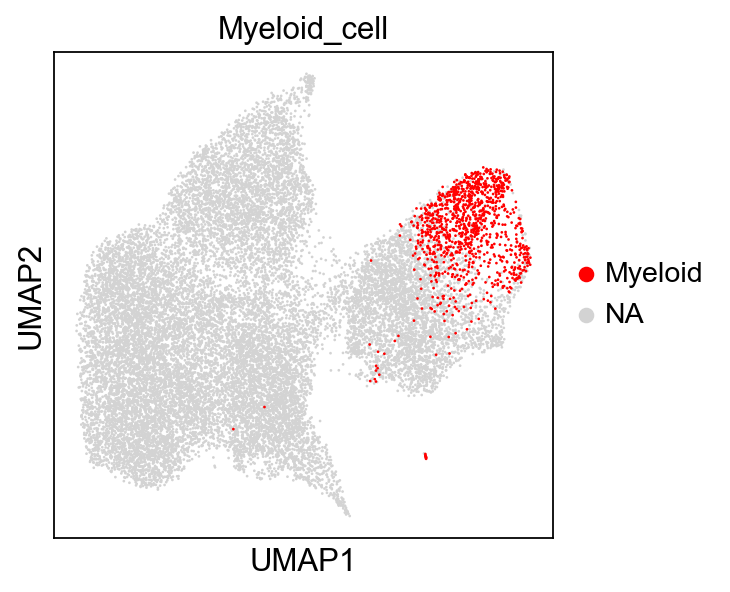

/Users/nellia/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


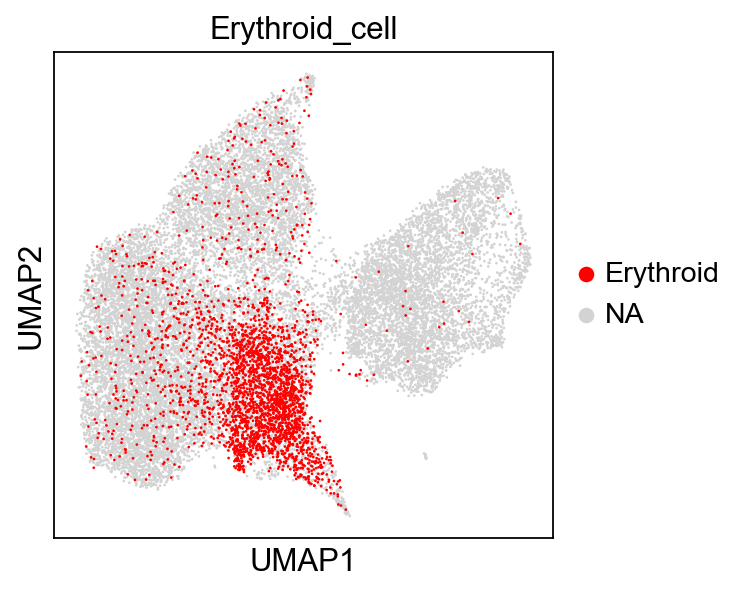

/Users/nellia/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


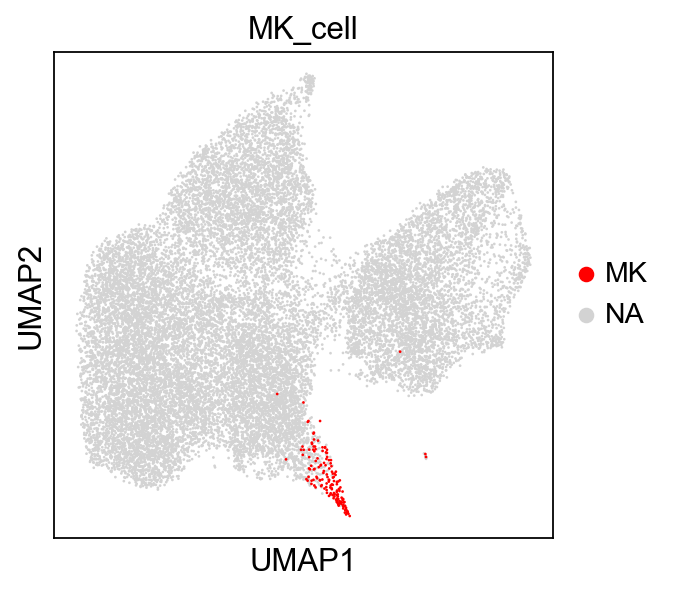

/Users/nellia/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


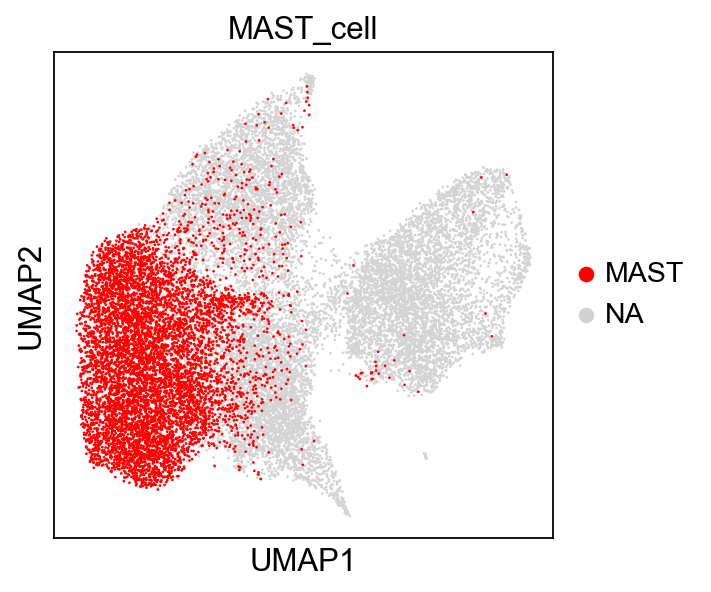

/Users/nellia/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


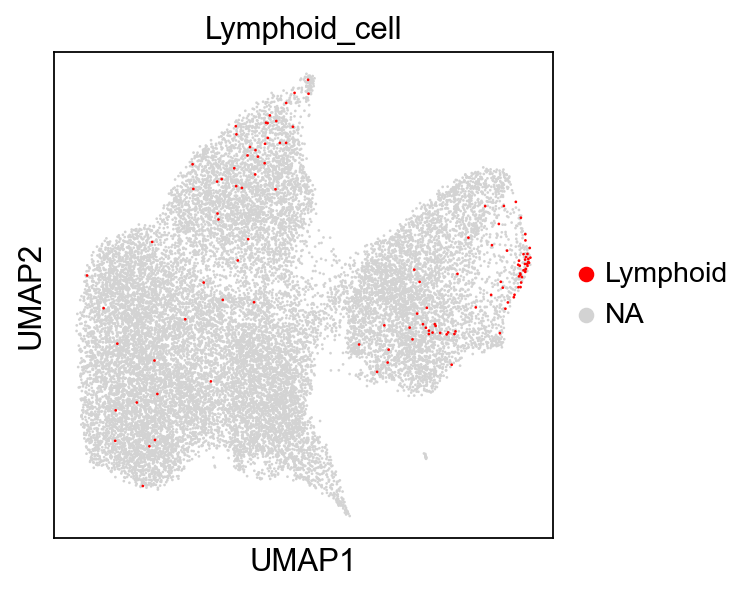

In [7]:
for cell_type in celltype_markers:
    cell_col = cell_type + '_cell'
    cell_colors = cell_type + "_cell_colors"
    cell_adata.uns[cell_colors] = np.array(["red","grey"])
    img_path = '_cell_' + cell_type + '.svg'
    plt.rcParams['svg.fonttype'] = 'none'
    sc.pl.umap(cell_adata, color=cell_col, groups=cell_type, save=img_path)

/Users/nellia/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


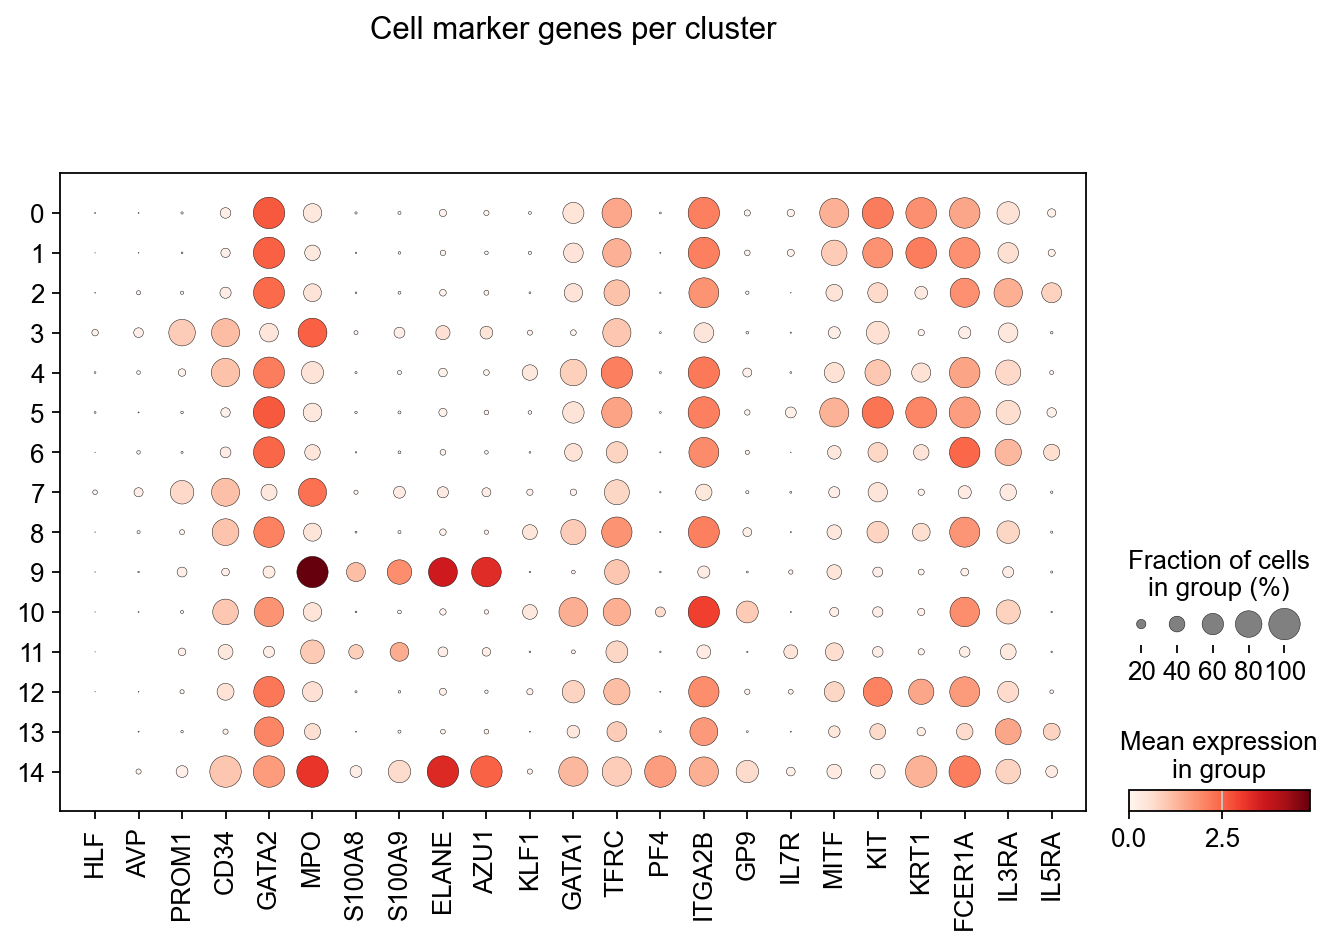

In [8]:
markers = ['HLF', 'AVP', 'PROM1', 'CD34', 'GATA2', 'MPO', 'S100A8', 'S100A9', 
             'ELANE', 'AZU1', 'KLF1', 'GATA1', 'TFRC', 'PF4', 'ITGA2B', 'GP9', 'IL7R', 'MITF','KIT', 
             'KRT1', 'FCER1A','IL3RA','IL5RA']
plt.rcParams['svg.fonttype'] = 'none'
sc.pl.dotplot(cell_adata, markers, groupby='leiden', title='Cell marker genes per cluster', save="markers.svg")

### Load the Processed Data

In [9]:
proc_data_path = out_data_path + "processed_ad.h5ad"
proc_ad = ad.read_h5ad(proc_data_path)

In [10]:
proc_ad

AnnData object with n_obs × n_vars = 20248 × 30267
    obs: 'dataset', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'scrublet'

In [11]:
# Add cell identities to processed data
cells= cell_adata.obs[["HSC_cell","Erythroid_cell","HSPC_cell", "Myeloid_cell", "MK_cell", "MAST_cell","Lymphoid_cell"]] 
proc_ad.obs = proc_ad.obs.join(cells)

In [12]:
proc_ad

AnnData object with n_obs × n_vars = 20248 × 30267
    obs: 'dataset', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'HSC_cell', 'Erythroid_cell', 'HSPC_cell', 'Myeloid_cell', 'MK_cell', 'MAST_cell', 'Lymphoid_cell'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'scrublet'

In [13]:
def mean_vln_gene_expr(gene_name, cell_type):
    obs_name = cell_type + '_cell'
    
    cell_ad = proc_ad[proc_ad.obs[obs_name] == cell_type]
    median_sf3b1 = np.mean(cell_ad[cell_ad.obs['dataset']=='SF3B1'][:,gene_name].X.toarray())
    median_aavs = np.mean(cell_ad[cell_ad.obs['dataset']=='AAVS'][:,gene_name].X.toarray())
    meds = [median_aavs, median_sf3b1]
    
    cell_plot = cell_type + "_" + gene_name + "_avg_violinpl.svg"
    ax = sc.pl.violin(cell_ad, gene_name, groupby='dataset', show=False, stripplot=False)
    ax.set_title('Expression of ' + gene_name + ' in ' + cell_type + ' cells')
    plt.scatter(x=range(len(meds)), y=meds, c='red')
    plt.xlim([-0.5,1.5])
    plt.savefig(cell_plot)

/Users/nellia/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


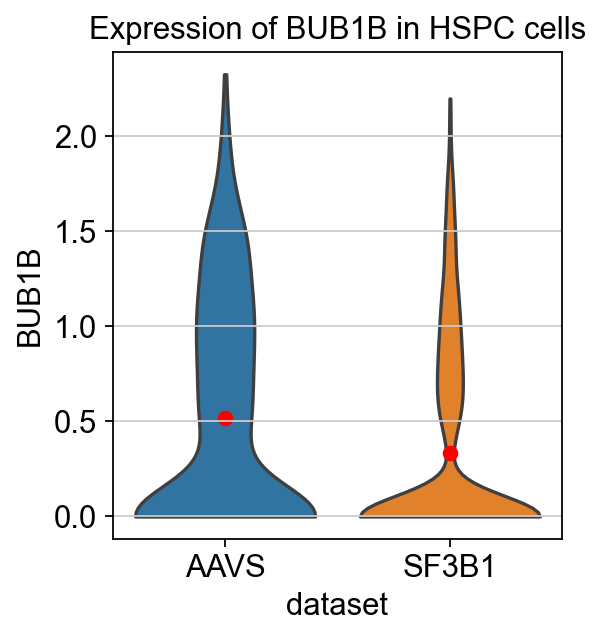

In [14]:
mean_vln_gene_expr("BUB1B", "HSPC")

/Users/nellia/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


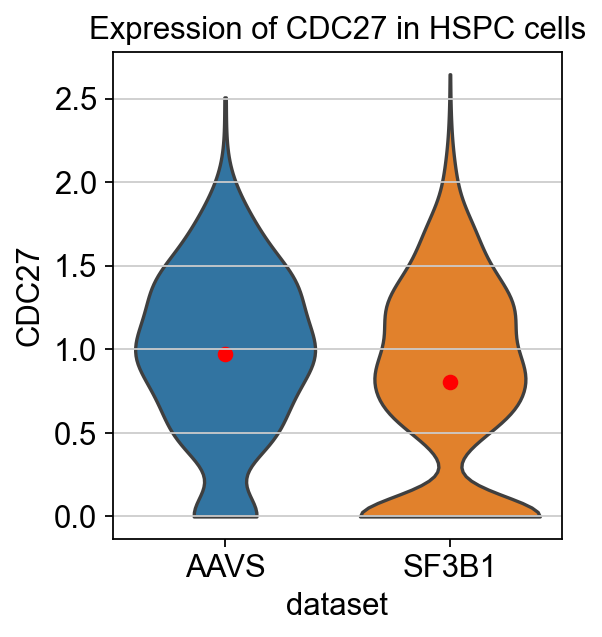

In [15]:
mean_vln_gene_expr("CDC27", "HSPC")

/Users/nellia/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


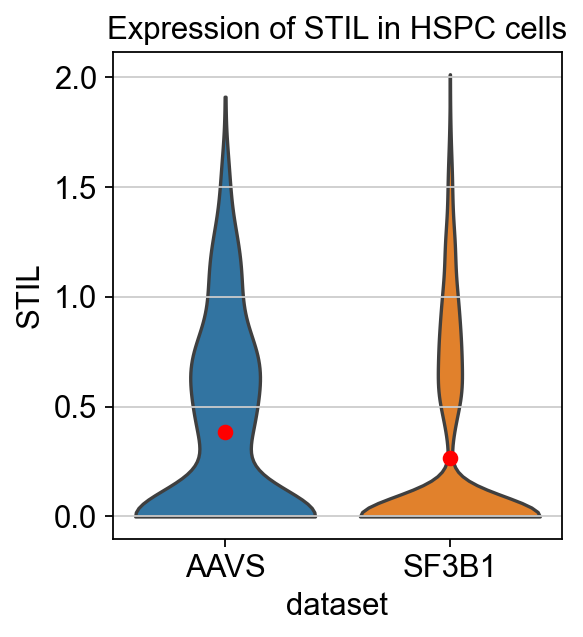

In [16]:
mean_vln_gene_expr('STIL','HSPC')

/Users/nellia/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


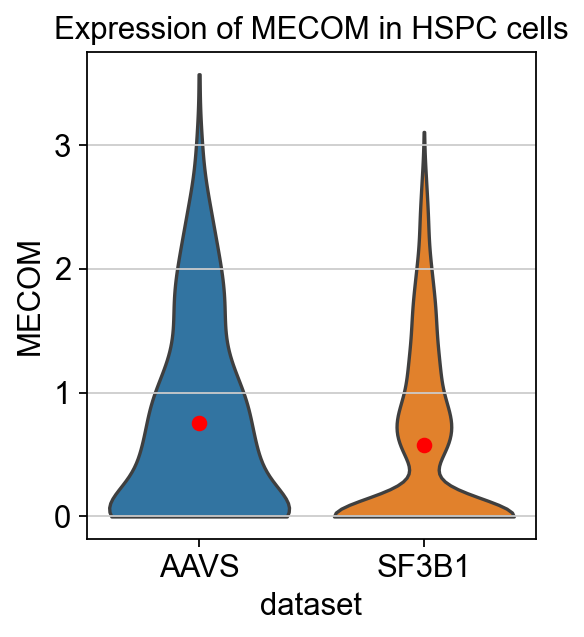

In [17]:
mean_vln_gene_expr('MECOM','HSPC')

/Users/nellia/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


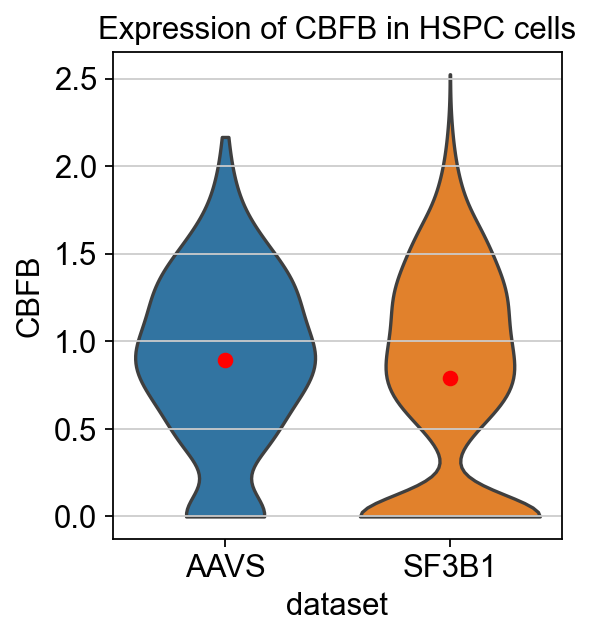

In [18]:
mean_vln_gene_expr("CBFB", "HSPC")

/Users/nellia/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


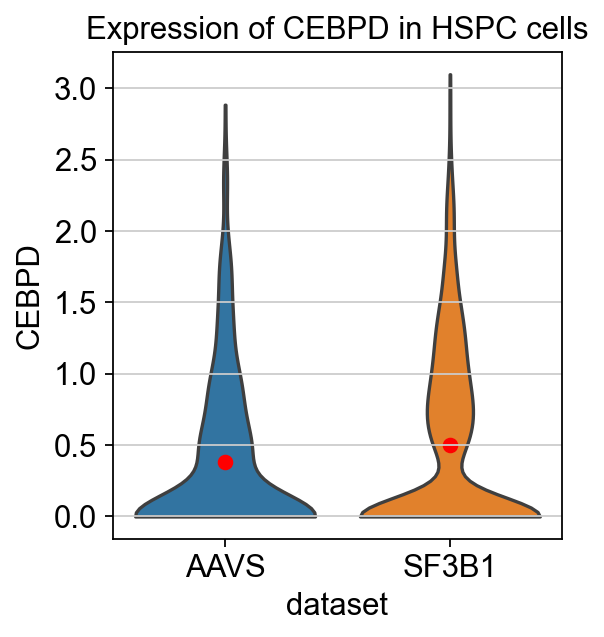

In [19]:
mean_vln_gene_expr("CEBPD", "HSPC")